In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
#movement of truck

def next_position(truck,time):
    x_curr = truck['x_curr']
    curr_dirn = truck['curr_dirn']
    speed = truck['speed']
    time = time
    return(x_curr + (curr_dirn*speed*time))

In [3]:
#forward moving truck arrival initiation

def for_truck_arr(trucks,time,position_of_junct):
    temp = {'x_curr':position_of_junct[0],'curr_dirn':1,'speed':1,'reverse_speed':1,'root_dirn':1,'arr_time':time,'depart_time':0,
        'for_dist':0,'back_dist':0}
    return trucks.append(temp)

In [4]:
#backward moving truck arrival initiation

def back_truck_arr(trucks,time,position_of_junct):
    temp = {'x_curr':position_of_junct[-1],'curr_dirn':-1,'speed':1,'reverse_speed':1,'root_dirn':-1,'arr_time':time,'depart_time':0,
        'for_dist':0,'back_dist':0}
    return trucks.append(temp)

In [5]:
#check if any of 2 trucks are near junctions, which means no need to consider collision

def not_near_junct(truck_1,truck_2,position_of_junct,time_delta):
    for i in range(0,len(position_of_junct)):
        if (abs(truck_1['x_curr'] - position_of_junct[i]) <= (truck_1['speed']*time_delta)) or (abs(truck_2['x_curr'] - position_of_junct[i]) <= (truck_2['speed']*time_delta)):
            return(0)
    
    return(1)

In [6]:
def dist_from_left_junc(x):
    
    for i in range(0,len(position_of_junct)):
        if x-position_of_junct[i] < 0:
            return(x-position_of_junct[i-1])
    
    return(0)

def dist_from_right_junc(x):
    
    for i in range(0,len(position_of_junct)):
        if x-position_of_junct[i] <= 0:
            return(abs(x-position_of_junct[i]))
    
    return(0)

In [7]:
#

def movement_desicion(trucks,collisions):
    
    if len(collisions) > 1:
        for i in range(0,len(collisions)-1):
            temp_coll = collisions[i]
            if len(temp_coll) > 1:                                     #merging collision pairs if multiple trucks on the same position
                for j in range(0,len(temp_coll)):
                    for k in range(i+1,len(collisions)):
                        if temp_coll[j] in collisions[k]:
                            collisions[i].extend(collisions[k])
                            collisions[k] = []

    for i in range(0,len(collisions)):
        if len(collisions[i]) <= 1:
            collisions[i] = []
 
    collisions = [x for x in collisions if x != []]                   #removing trucks with no collisions

    if len(collisions) > 0:
        for i in range(0,len(collisions)):                             #assigning direction to trucks at one point in order to clear traffic, acc to less reverse cumulative total dist to be travelled given which trucks move backward

            temp_coll = collisions[i]
            temp_for = 0
            temp_back = 0
            dist_from_prev_junc = dist_from_left_junc(trucks[temp_coll[0]]['x_curr'])
            dist_from_next_junc = dist_from_right_junc(trucks[temp_coll[0]]['x_curr'])

            for j in range(0,len(temp_coll)):
                if trucks[temp_coll[j]]['root_dirn'] == 1:
                    temp_for = temp_for + 1

                if trucks[temp_coll[j]]['root_dirn'] == -1:
                    temp_back = temp_back + 1

            if ((temp_for*dist_from_prev_junc) >= (temp_back*dist_from_next_junc)):
                temp_curr = 1

            else:
                temp_curr = -1

            for j in range(0,len(temp_coll)):
                trucks[temp_coll[j]]['curr_dirn'] = temp_curr

In [8]:
#initialization of params

time_delta = 0.0001                    #4th decimal place , will require this in rounding off to avoid floating point sum precision error
no_of_junctions = 16                   #including start and end node
#dist_bw_junct = [1]*no_of_junctions    #taken const and same

mu=5
sigma=2
position_of_junct = np.random.normal(mu, sigma, no_of_junctions-2)
position_of_junct= [round(xyz,2) for xyz in position_of_junct]
position_of_junct.sort()
position_of_junct.append(10)
position_of_junct=[0]+position_of_junct

#junct_capacity = []
#junct_use_count = []

#trucks arrive at both ends following uniform dist
no_of_trucks_to_sim_each_dir = 5
sim_run_totaltime = 50
for_truck_arr_times = np.sort([round(num,2) for num in np.random.uniform(0,sim_run_totaltime/2,no_of_trucks_to_sim_each_dir)])
back_truck_arr_times = np.sort([round(num,2) for num in np.random.uniform(0,sim_run_totaltime/2,no_of_trucks_to_sim_each_dir)])

In [9]:
for_truck_arr_times

array([ 4.5 , 12.64, 14.19, 16.43, 24.93])

In [10]:
back_truck_arr_times

array([ 0.55,  4.95, 15.57, 19.26, 22.58])

In [11]:
#simulation starts

trucks = []                                #list of trucks running
reached_trucks = []                        #list of trucks reached to their destination
t = 0                                      #global timeline

while t < sim_run_totaltime:                            #simulate for 1000 unit times or can change to condition when all trucks reach their detination 
    
    #print(t)
    
    if len(trucks) == 0 and t > max(max(for_truck_arr_times),max(back_truck_arr_times)):                   #stop simulation if all trucks reached
        print('simulation ends early')
        break
    
    if(t in for_truck_arr_times):          #trucks arrive at start node
        for_truck_arr(trucks,t,position_of_junct)
    if(t in  back_truck_arr_times):        #trucks arrive at end node 
        back_truck_arr(trucks,t,position_of_junct)
    
    t = round(t + time_delta,4)                            #time increment
    
    if len(trucks) > 0:                                    #all this calculations if any trucks running  
        for i in range(0,len(trucks)):                     #reseting truck movement direction ones it reaches junction after moving reverse dir
            if trucks[i]['x_curr'] in position_of_junct:
                trucks[i]['curr_dirn'] = trucks[i]['root_dirn']


        collisions = []                                    #observing collisions over complete path
        temp_trucks = trucks
        for i in range(0,len(temp_trucks)):

            temp_coll = [i]
            temp_1 = temp_trucks[i]

            for j in range(i+1,len(temp_trucks)):

                temp_2 = temp_trucks[j]
                if not_near_junct(temp_1,temp_2,position_of_junct,time_delta):           #if not near junctions and unit dist close to each other moving in opp directions
                    if abs(temp_1['x_curr'] - temp_2['x_curr']) <= (temp_1['speed']*time_delta) and temp_1['curr_dirn'] != temp_2['curr_dirn']:
                        temp_coll.append(j)

            collisions.append(temp_coll)

        movement_desicion(trucks,collisions)              #change current directions of trucks acc to cumulative closeness to nearby nodes, in order to make decision which of the trucks move in reverse direction
        
        remove_trucks = []
        
        for i in range(0,len(trucks)):
            
                                        #stop trucks if reached destination, remove them from active running trucks
            
            if trucks[i]['root_dirn'] == 1:
                if (trucks[i]['x_curr'] >= position_of_junct[-1]):
                    trucks[i]['depart_time'] = t
                    reached_trucks.append(trucks[i])
                    remove_trucks.append(i)
                    #trucks.pop(i)
                    #trucks[i]['speed'] = 0
                    #trucks[i]['reverse_speed'] = 0 

            if trucks[i]['root_dirn'] == -1:
                if (trucks[i]['x_curr'] <= position_of_junct[0]):
                    trucks[i]['depart_time'] = t
                    reached_trucks.append(trucks[i])
                    remove_trucks.append(i)
                    #trucks.pop(i)
                    #trucks[i]['speed'] = 0
                    #trucks[i]['reverse_speed'] = 0 
        
        for k in remove_trucks:
            trucks.pop(k)
        
                                                                          #add forward or backward movement for trucks 
        if len(trucks) > 0:
            for i in range(0,len(trucks)):
                if trucks[i]['curr_dirn'] == trucks[i]['root_dirn']:
                    trucks[i]['for_dist'] = trucks[i]['for_dist'] + trucks[i]['speed']*time_delta

                else:
                    trucks[i]['back_dist'] = trucks[i]['back_dist'] + trucks[i]['speed']*time_delta


                trucks[i]['x_curr'] = round(next_position(trucks[i],time_delta),4)     #move truck to next position accordingly

simulation ends early


In [12]:
t

35.6901

In [13]:
trucks

[]

In [14]:
reached_trucks

[{'x_curr': 0.0,
  'curr_dirn': -1,
  'speed': 1,
  'reverse_speed': 1,
  'root_dirn': -1,
  'arr_time': 0.55,
  'depart_time': 11.4401,
  'for_dist': 10.444999999988996,
  'back_dist': 0.4449999999999673},
 {'x_curr': 10.0,
  'curr_dirn': 1,
  'speed': 1,
  'reverse_speed': 1,
  'root_dirn': 1,
  'arr_time': 4.5,
  'depart_time': 14.9701,
  'for_dist': 10.234999999989485,
  'back_dist': 0.23499999999999044},
 {'x_curr': 0.0,
  'curr_dirn': -1,
  'speed': 1,
  'reverse_speed': 1,
  'root_dirn': -1,
  'arr_time': 4.95,
  'depart_time': 21.4701,
  'for_dist': 13.259999999982435,
  'back_dist': 3.260000000002455},
 {'x_curr': 10.0,
  'curr_dirn': 1,
  'speed': 1,
  'reverse_speed': 1,
  'root_dirn': 1,
  'arr_time': 12.64,
  'depart_time': 24.0001,
  'for_dist': 10.679999999988448,
  'back_dist': 0.6799999999999414},
 {'x_curr': 10.0,
  'curr_dirn': 1,
  'speed': 1,
  'reverse_speed': 1,
  'root_dirn': 1,
  'arr_time': 14.19,
  'depart_time': 24.1901,
  'for_dist': 9.999999999990033,
  'b

In [15]:
for_dist_t = [np.array(i['for_dist']) for i in reached_trucks]
back_dist_t = [np.array(i['back_dist']) for i in reached_trucks]
time_taken_t = [np.array(i['depart_time']-i['arr_time']) for i in reached_trucks]

In [16]:
print(np.mean(for_dist_t))
print(np.mean(back_dist_t))
print(np.mean(time_taken_t))

10.80799999998815
0.8080000000002047
11.6161


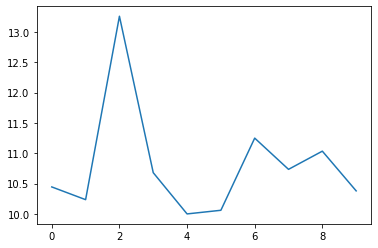

In [17]:
plt.plot(for_dist_t)

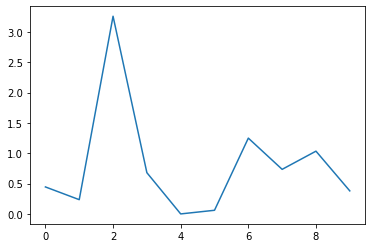

In [18]:
plt.plot(back_dist_t)

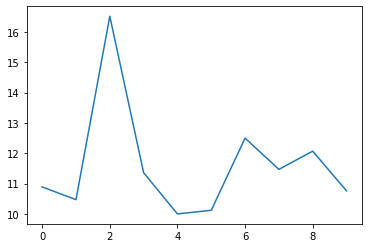

In [19]:
plt.plot(time_taken_t)